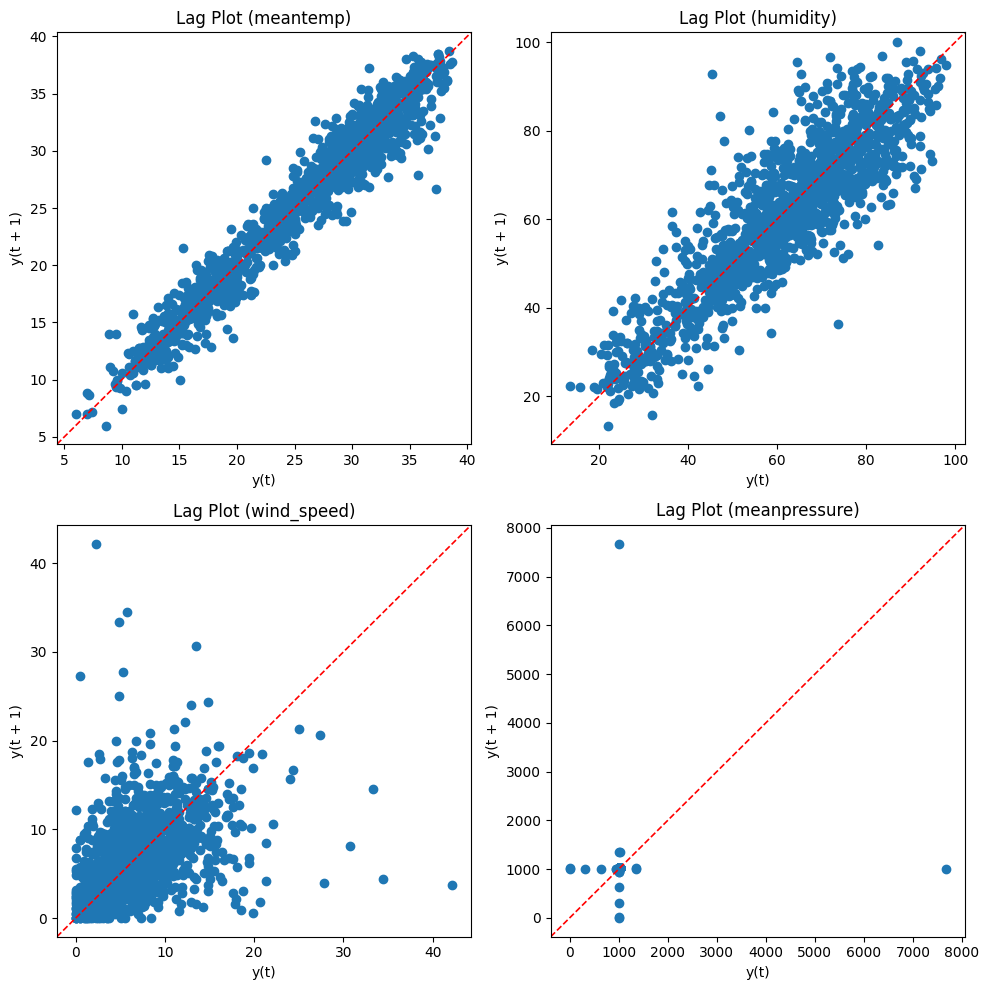

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

d = pd.read_csv("Datasets/DailyDelhiClimateTrain.csv",
                 header=0, index_col=0, parse_dates=True)

plt.figure(figsize=(10, 10))

# Autocorrelation using lag plots for each column (feature)
for i, col in enumerate(d.columns, 1):
    plt.subplot(2, 2, i)
    pd.plotting.lag_plot(d[col], lag=1)
    plt.title(f'Lag Plot ({col})')
    
    # Red line y=x for comparison
    lims = plt.xlim()
    plt.plot(lims, lims, 'r--', linewidth=1.2)
    plt.xlim(lims)
    plt.ylim(lims)
    
plt.tight_layout()
plt.show()


In [11]:
# Autocorrelation using correlation coefficients for each column (feature)
for i, col in enumerate(d.columns, 1):
    print(f"\nAutocorrelation for {col}:")
    val = pd.DataFrame(d[col])
    
    # Create lagged dataset
    df = pd.concat([val.shift(3), val.shift(2),
                    val.shift(1), val], axis=1)
    
    # Set column names
    df.columns = ['t', 't+1', 't+2', 't+3']
    
    res = df.corr()
    print(res)


Autocorrelation for meantemp:
            t       t+1       t+2       t+3
t    1.000000  0.974139  0.956518  0.942623
t+1  0.974139  1.000000  0.974173  0.956513
t+2  0.956518  0.974173  1.000000  0.974067
t+3  0.942623  0.956513  0.974067  1.000000

Autocorrelation for humidity:
            t       t+1       t+2       t+3
t    1.000000  0.878264  0.783357  0.718960
t+1  0.878264  1.000000  0.878483  0.783858
t+2  0.783357  0.878483  1.000000  0.878608
t+3  0.718960  0.783858  0.878608  1.000000

Autocorrelation for wind_speed:
            t       t+1       t+2       t+3
t    1.000000  0.436903  0.222736  0.171149
t+1  0.436903  1.000000  0.436890  0.222685
t+2  0.222736  0.436890  1.000000  0.436438
t+3  0.171149  0.222685  0.436438  1.000000

Autocorrelation for meanpressure:
            t       t+1       t+2       t+3
t    1.000000  0.003100  0.010795  0.002648
t+1  0.003100  1.000000  0.003101  0.010795
t+2  0.010795  0.003101  1.000000  0.003101
t+3  0.002648  0.010795  0.003101 

As the lag plots and the correlation matrixes show, there is a strong autocorrelation between the values y(t) and y(t+1) in mean temperature (~ 0.974), with t as days.

Humidity has also a strong correlation, with a bit more dispersion than mean temperature's graph (~ 0.878). 

For wind speed, as expected, the correlation is not so strong, meaning the measurements of a particular day do not influence much the measurement of the following day (~ 0.437).

The mean pressure behaves differently. The lag plot reveals a strong outlier (value ~ 8000) that makes the correlation difficult to analyze from the plot. There are also outliers closer to the normal behavior of the data, and all outliers in the datasets cause a near 0 correlation between the measurements.

To obtain a more meaningful analysis, we remove these outliers and repeat the calculations.


Autocorrelation for meanpressure:
            t       t+1       t+2       t+3
t    1.000000  0.901668  0.873459  0.859079
t+1  0.901668  1.000000  0.901737  0.873550
t+2  0.873459  0.901737  1.000000  0.901805
t+3  0.859079  0.873550  0.901805  1.000000


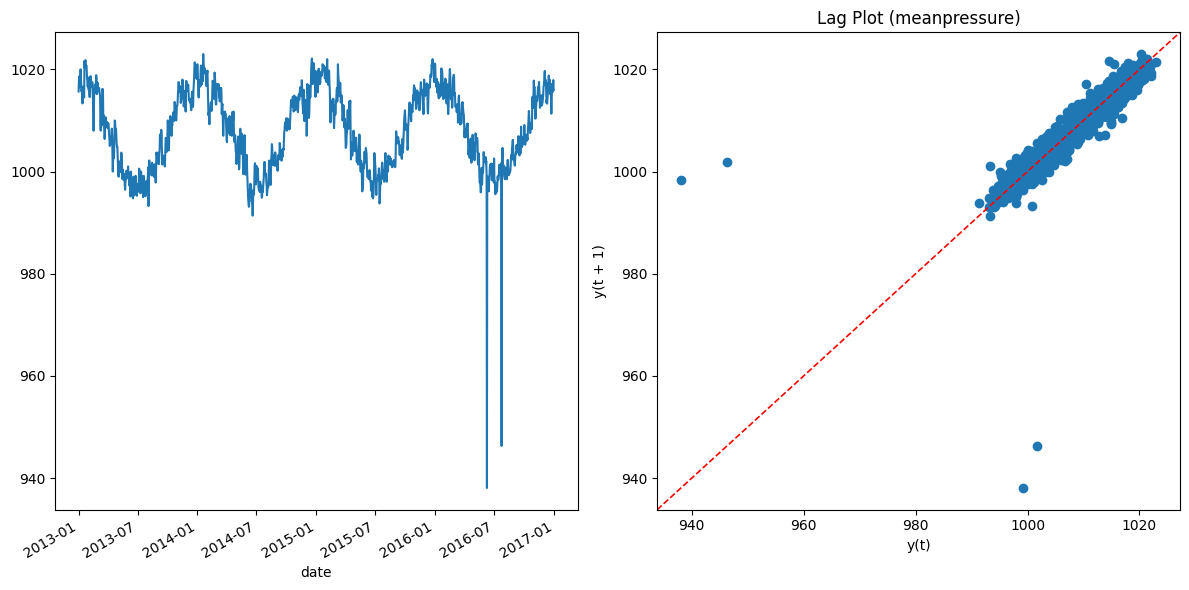

In [12]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
d_mod = d[(d['meanpressure'] > 700) & (d['meanpressure'] < 1320)]
d_mod['meanpressure'].plot()

plt.subplot(1, 2, 2)
pd.plotting.lag_plot(d_mod['meanpressure'], lag=1)
plt.title('Lag Plot (meanpressure)')  

lims = plt.xlim()
plt.plot(lims, lims, 'r--', linewidth=1.2)
plt.xlim(lims)
plt.ylim(lims)
plt.tight_layout()

print(f"\nAutocorrelation for meanpressure:")
val = pd.DataFrame(d_mod['meanpressure'])

# Create lagged dataset
df = pd.concat([val.shift(3), val.shift(2),
                val.shift(1), val], axis=1)

# Set column names
df.columns = ['t', 't+1', 't+2', 't+3']

res = df.corr()
print(res)

After removing most outliers, the analysis is more clear: in the mean pressure feature column, there is a strong correlation between the values (~ 0.901), behaving like a sinusoidal wave, within the range 995-1200.

We can conclude that these strong outliers can complicate further analyses, and a proper way to handle these values must be found.